
# Data Science Course Work


### Snehaa Ganesan
### sg4860@nyu.edu
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv` (you can find this on NYU Classes).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [69]:
#Place your code here

#importing relevant libraries
import pandas as pd
import numpy 
from pandas import DataFrame
import os
from os import system

#Loading the csv file using pandas dataframe
df = pd.read_csv('Cell2Cell_data.csv', sep=',')

#Eliminating/Dropping any duplicate entries to reduce data 
df.drop_duplicates()

#Shuffling the data 3 times (and re indexing) to make the split(in the next step) random 
df3 = df.sample(frac=1).reset_index(drop=True)
df2 = df.sample(frac=1).reset_index(drop=True)
df1 = df.sample(frac=1).reset_index(drop=True)


#Taking 80% of the data after shuffling as train_df
train_df = df1.ix[:(0.8)*39859, :12]
#train_df

#Taking 20% of the data after shuffling as test_df
test_df = df1.ix[((0.8)*39859):, :12]
#test_df




2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)

Finding Varaince will show randomness

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [70]:
#Place your code here

#importing relevant libraries

import matplotlib
import matplotlib.pyplot as plt
#from matplotlib.pyplot import rcdefaults

import sklearn
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#Saving churndep of train_df and test_df into new dataframes
cd_train = train_df.churndep
cd_test = test_df.churndep

#Alloting 1st 11 columns as features, and the 12th as targets for DTC
features = list(df.columns[:11])
targets = list(df.columns[11:])

#Alloting features as X, 'churndep' as y for fitting 
X = train_df[features]
y = train_df["churndep"]

#Building the required DecisionTreeClassifier with criterion='entropy'
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Fitting the train data
clf2 = clf.fit(X, y)

#Dropping target field "churndep" from test_df to enable prediction (input and model should have same number of fields)
test1 = test_df
test2 = test1.drop('churndep', axis=1)

#Predicting the test data (test2) on the Decision Tree Classifier model build and trained
y3 = clf.predict(test2)

#Printing the result (prediction of "churndep" on test data (test2))
y3


array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
imp = DataFrame(clf2.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(['Imp'], ascending = False)
imp

               Imp
revenue   0.271585
eqpdays   0.246531
outcalls  0.184108
incalls   0.129213
months    0.097245
marryyes  0.023630
pcown     0.018087
creditcd  0.011593
travel    0.009399
retcalls  0.004949
webcap    0.003659

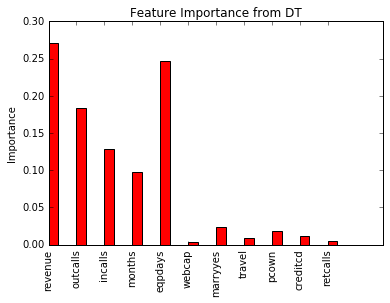

 None


In [60]:
#computing Imporatance
imp = DataFrame(clf2.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(['Imp'], ascending = False)

#Constructing the bar plot
fig, ax = plt.subplots()
width=0.35
#ax.bar(train.drop(lab,1).columns.values, clf.feature_importances_, width, color='r')
ax.bar(numpy.arange(11), clf2.feature_importances_, width, color='r')
ax.set_xticks(numpy.arange(len(clf2.feature_importances_)))
ax.set_xticklabels(X.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Importance')

print(imp), plt.show()

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [71]:
imp_cols=list(['revenue','outcalls','eqpdays','churndep'])
df_imp = df1[imp_cols]
df_imp.corr()


,revenue,outcalls,eqpdays,churndep
revenue,1.000000,0.500870,-0.221958,-0.013566
outcalls,0.500870,1.000000,-0.243999,-0.037233
eqpdays,-0.221958,-0.243999,1.000000,0.112731
churndep,-0.013566,-0.037233,0.112731,1.000000


6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [72]:
#Importing accuracy_score
from sklearn.metrics import accuracy_score

#Dropping target field "churndep" from train_df to enable prediction (input and model should have same number of fields)
train1 = train_df
train2 = train1.drop('churndep', axis=1)



#Predicting churndep for both train and test data using the model
try_train = clf2.predict(train2)
try_test = clf2.predict(test2)


#try_train
#try_test

#Accuracy of (train_df)'s churndep against it's churndep as predicted by the model (1=>100%, 0=>0%, 0.5=>50% accurate)
accuracy_score(cd_train, try_train)

#accuracy_score(cd_test, try_test)



0.99984320120421477

In [73]:
#Accuracy of (test_df)'s churndep against it's churndep as predicted by the model (1=>100%, 0=>0%, 0.5=>50% accurate)
accuracy_score(cd_test, try_test)

0.54961736294065988

### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [63]:
import random

min_samples_split=[]
min_samples_leaf=[]
for i in range(10):
    min_samples_split.append(random.randint(2,6000))
    min_samples_leaf.append(random.randint(1,500))
min_samples_split , min_samples_leaf

([2470, 4196, 3539, 2911, 2255, 3742, 4864, 6464, 4012, 4482],
 [562, 597, 306, 885, 531, 316, 462, 475, 453, 889])

2\. Explain in words your reasoning for choosing the above ranges.

(1 Points)

In [87]:
#Accuracy difference shown

clf_1 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=6000, min_samples_leaf=500)
clf_1.fit(X,y)
tt1 = clf_1.predict(test2)
accuracy_score(cd_test, tt1)

0.5992974532680968

In [88]:
#Accuracy difference shown

clf_1 = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=7000, min_samples_leaf=600)
clf_1.fit(X,y)
tt1 = clf_1.predict(test2)
accuracy_score(cd_test, tt1)

0.59666290302346003

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file cases.csv is available on NYU Classes.



1\. Load the timeseries data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [11]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.api import qqplot

#Loading dataset
df = pd.read_csv('cases.csv', sep=',')

#Converting to date-time format
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

#Deleting column 'YEAR' since we already converted it to date-time format
del df["YEAR"]
df

,YFCASES
1700-12-31 00:00:00,5.0
1701-12-31 00:00:00,11.0
1702-12-31 00:00:00,16.0
1703-12-31 00:00:00,23.0
1704-12-31 00:00:00,36.0
1705-12-31 00:00:00,58.0
1706-12-31 00:00:00,29.0
1707-12-31 00:00:00,20.0
1708-12-31 00:00:00,10.0
1709-12-31 00:00:00,8.0


In [44]:
#Plotting df
#%matplotlib inline
#df.plot(figsize=(12,8));

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

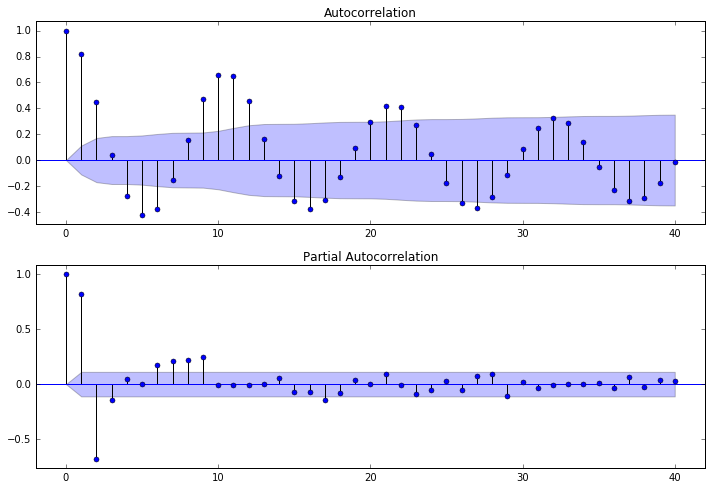

In [23]:
#Plotting the ACF and PCF

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)



3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


<p>
<span style="color:blue">
Plot indicates the Rule 2 , Hence, we must use 2 AR(p) parameters.
</span>
</p>

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [114]:
#
from statsmodels.regression.linear_model import OLS
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import adfuller

dw_output=sm.stats.durbin_watson(df)
dw_output

array([  7.02118084e-01,   1.19269042e+00,   1.28178054e+00,
         2.64118296e-01,   2.19048047e-01,   1.42300796e-01,
         1.25683285e+00,   1.88664323e+00,   1.62024631e+00,
         6.08180840e-01,   9.39423077e-01,   5.02487312e-05])

In [ ]:
#Hence, positive autocorrelation

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


In [29]:
#ARMA with p,q as taken from above (2,0) , Rule 2
arma_2_0= sm.tsa.ARMA(df, (2,0)).fit()
arma_2_0.params



const            49.659343
ar.L1.YFCASES     1.390656
ar.L2.YFCASES    -0.688571
dtype: float64

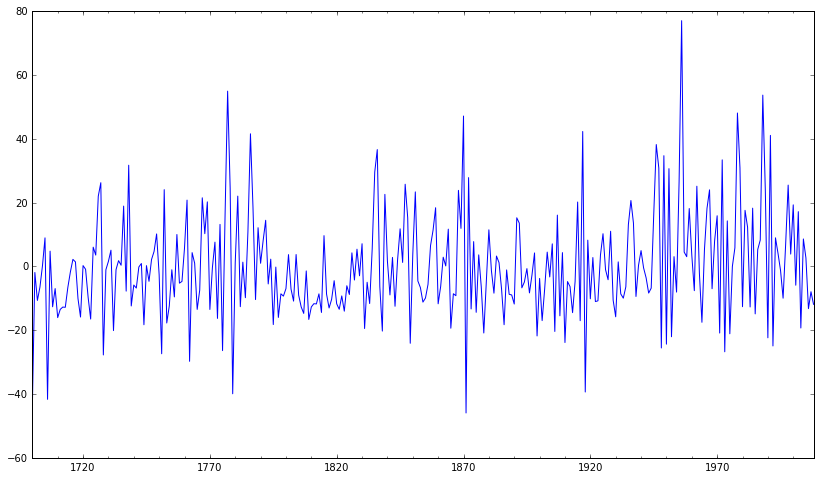

In [35]:
#Plot of the resulting process
%matplotlib inline
fig = plt.figure(figsize=(14,8))
ax3 = fig.add_subplot(111)
resid = arma_2_0.resid
ax = resid.plot(ax=ax3);



6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



In [36]:
#Place your code here
stats.normaltest(resid)



NormaltestResult(statistic=41.736017448911511, pvalue=8.6524472974138723e-10)

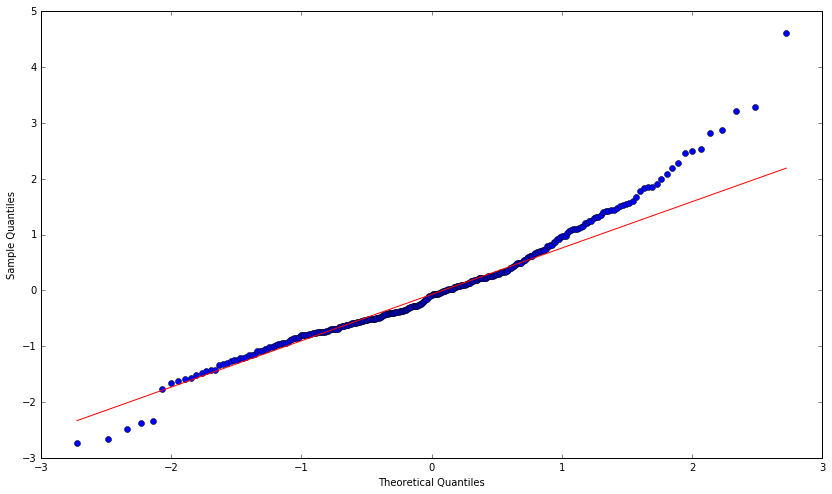

In [38]:
%matplotlib inline
fig = plt.figure(figsize=(14,8))
ax4 = fig.add_subplot(111)
fig = qqplot(resid, line='q', ax=ax4, fit=True)

7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


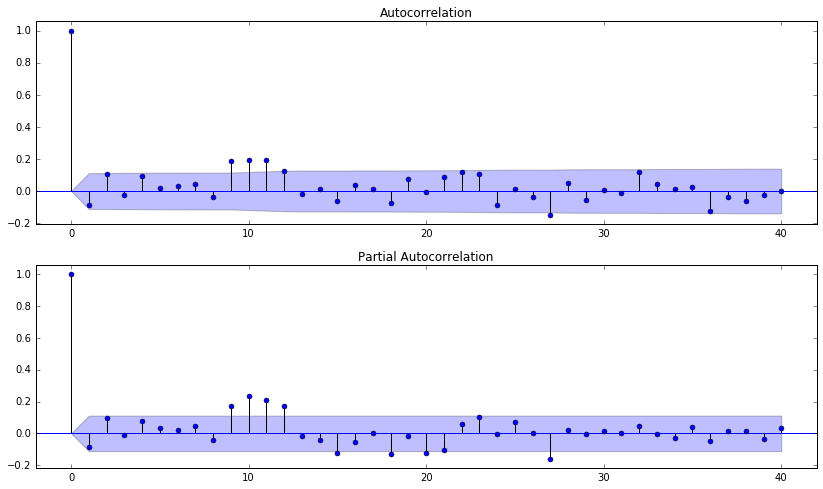

In [40]:
#Place your code here
%matplotlib inline
fig = plt.figure(figsize=(14,8))
ax5 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40, ax=ax5)
ax6 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax6)

In [43]:
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
d1 = np.c_[range(1,41), r[1:], q, p]
table1 = pd.DataFrame(d1, columns=['lag', "AC", "Q", "Prob(>Q)"])
table1.set_index('lag')

,AC,Q,Prob(>Q)
lag,,,
1.0,-0.085220,2.265963,0.132244
2.0,0.103691,5.631595,0.059857
3.0,-0.027833,5.874879,0.117859
4.0,0.091122,8.491075,0.075158
5.0,0.019010,8.605309,0.125881
6.0,0.031321,8.916433,0.178333
7.0,0.044485,9.546129,0.215785
8.0,-0.034337,9.922561,0.270503
9.0,0.185690,20.967736,0.012794


<p>
<span style="color:blue">
Did not improve. Since if we notice, the p values for lags 1 to 8 , is much greater than 0.05. Whereas for other lags it is less than 0.05, meaning,there is much data not contributing to correlations at high lags. 
</span>
</p>

End